In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

Lendo arquivo CSV

In [18]:
df = pd.read_csv('emprestimo.csv', sep=';')
print(df.head())

  montante   idade salario tem_conta empresta
0    Medio  Senior   Baixo       Sim      Nao
1    Medio  Senior   Baixo       Nao      Nao
2    Baixo  Senior   Baixo       Sim      Sim
3     Alto   Media   Baixo       Sim      Sim
4     Alto   Jovem    Alto       Sim      Sim


Nomeando dados

In [19]:
translate = {
    'montante': { 'Alto': 2, 'Medio': 1, 'Baixo': 0 },
    'idade': { 'Senior': 2, 'Media': 1, 'Jovem': 0 },
    'salario': { 'Alto': 1, 'Baixo': 0 },
    'tem_conta': { 'Sim': 1, 'Nao': 0 },
    'empresta': { 'Sim': 1, 'Nao': 0 }
}

for col in df:
    df[col] = df[col].apply(lambda k: translate[col][k])
print(df.head())
#o codigo não pode ser rodado 2x.

   montante  idade  salario  tem_conta  empresta
0         1      2        0          1         0
1         1      2        0          0         0
2         0      2        0          1         1
3         2      1        0          1         1
4         2      0        1          1         1


Definindo Variaveis e resultados

In [20]:
x = df[['montante', 'idade', 'salario', 'tem_conta']]
y = df['empresta']
print(y.head())

0    0
1    0
2    1
3    1
4    1
Name: empresta, dtype: int64


Importando Train test split

In [21]:
from sklearn.model_selection import train_test_split
ttp = train_test_split

Definindo SEED

In [22]:
SEED = 7

Separando casos de testes e treino

In [23]:
treino_x, teste_x, treino_y, teste_y = ttp(x, y, random_state=SEED, test_size=0.5, stratify= y )
print(teste_x.shape)
print(teste_y.shape)

(7, 4)
(7,)


In [24]:
from dataclasses import dataclass
@dataclass(frozen=True)
class ModelResult:
    n: int
    clf: DecisionTreeClassifier
    acc: float

In [25]:
def tree_model(max_depth: int):
    # clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42) # usa "gini" como padrão
    # constrói o modelo usando critério “Entropia” e max_depth variável
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42) 
    
    # treina o modelo – observe que nessa abordagem está usando 33% para testes (ver acima!)
    # (sem separação)
    clf.fit(treino_x, treino_y)

    # aplica o modelo e mede acurácia
    pred_y = clf.predict(teste_x)
    acc = metrics.accuracy_score(teste_y, pred_y)
    return ModelResult(acc=acc, clf=clf, n=max_depth)

# mostra resultados de acurácil para cada modelo gerado por tree_model
results = {n: tree_model(n) for n in range(1,4)}
print(*[(n, r.acc) for n, r in results.items()])

(1, 0.5714285714285714) (2, 0.42857142857142855) (3, 0.42857142857142855)


Plotagem

Index(['montante', 'idade', 'salario', 'tem_conta'], dtype='object') ['1' '0']


[Text(0.4, 0.8333333333333334, 'salario <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = 0'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 1'),
 Text(0.6, 0.5, 'tem_conta <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = 0'),
 Text(0.4, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 1'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 0')]

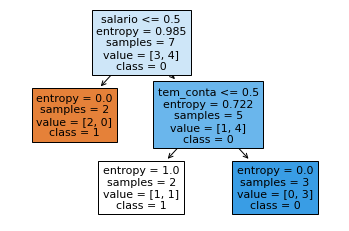

In [26]:
# Plotagem da árvore
clf = results[2].clf
f_names = teste_x.columns
c_names = teste_y.unique().astype(str)
print(f_names, c_names)
tree.plot_tree(clf, feature_names=f_names,class_names=c_names, filled=True)

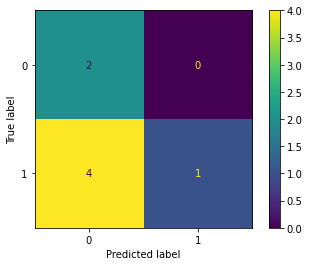

In [27]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(teste_x);
cm = confusion_matrix(teste_y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [31]:
# Testando para uma entrada específica:
W_test = pd.DataFrame({'montante': [0], 'idade': [2], 'salario': [0], 'tem_conta': [1]})
y_pred = clf.predict(W_test)
y_pred

array([0])